# segmetation 

##  1) 인물모드 사진 만들기(사람, 고양이)
##  2) 배경의 blur처리가 아닌 다른 배경으로 교체하는 크로마키 배경 합성을 사용하기
##  3) 인물모드 사진의 문제점과 개선 방안 제시해보기

## --------------------------------------------------------------------------------------------

## 1. 인물모드 직접 해보기(연예인, 고양이 사진으로)

In [1]:
#필요한 라이브러리 임포트

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

<class 'numpy.ndarray'> (605, 566, 3)


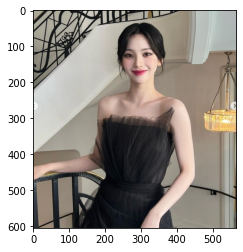

In [3]:
#파일 불러오기
img_path = os.getenv('HOME')+'/aiffel/workspace/human_segmentation/images'

#image 폴더 내의 이미지들 가져오기 (실습 때 진행한 이미지 빼기)
image_k_path, image_j_path, image_h_path = os.path.join(img_path, 'image1.jpeg'), os.path.join(img_path, 'image2.jpeg'), os.path.join(img_path, 'image3.jpeg')
cat_path = os.path.join(img_path, 'cat.png')

k_img = cv2.imread(image_k_path) 
j_img = cv2.imread(image_j_path)
h_img = cv2.imread(image_h_path)
cat_img = cv2.imread(cat_path)

print(type(k_img), k_img.shape)
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
plt.imshow(cv2.cvtColor(k_img, cv2.COLOR_BGR2RGB))
plt.show()      

<class 'numpy.ndarray'> (1005, 670, 3)


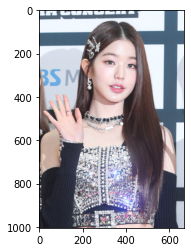

In [4]:
print(type(j_img), j_img.shape)
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
plt.imshow(cv2.cvtColor(j_img, cv2.COLOR_BGR2RGB))
plt.show()      

<class 'numpy.ndarray'> (1134, 850, 3)


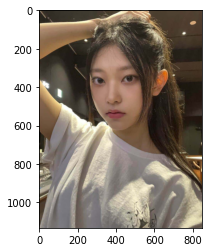

In [5]:
print(type(h_img), h_img.shape)
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
plt.imshow(cv2.cvtColor(h_img, cv2.COLOR_BGR2RGB))
plt.show()      

<class 'numpy.ndarray'> (626, 417, 3)


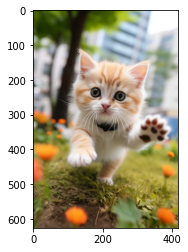

In [6]:
print(type(cat_img), cat_img.shape)
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB))
plt.show()      

In [7]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장

# 1
model_dir = os.getenv('HOME')+'/aiffel/workspace/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/workspace/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f112a4a5220>)

In [8]:
# 1
model_dir = os.getenv('HOME')+'/aiffel/workspace/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [9]:
segvalues_k, output_k = model.segmentAsPascalvoc(image_k_path) 
segvalues_j, output_j = model.segmentAsPascalvoc(image_j_path) 
segvalues_h, output_h = model.segmentAsPascalvoc(image_h_path) 
segvalues_cat, output_cat = model.segmentAsPascalvoc(cat_path) 

# segmentAsPascalvoc()함수를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할은 pacalvoc 데이터로 학습된 모델을 이용
# 총 4개의 이미지, (image1, 2, 3, cat)

In [10]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

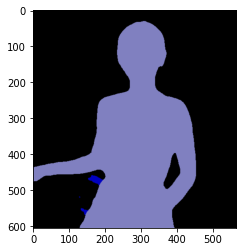

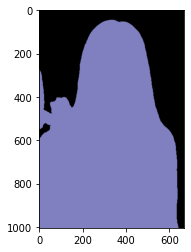

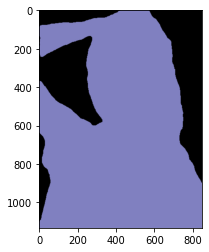

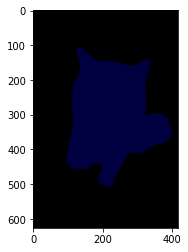

In [11]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output_k)
plt.show()

plt.imshow(output_j)
plt.show()

plt.imshow(output_h)
plt.show()

plt.imshow(output_cat)
plt.show()

In [12]:
segvalues_k # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력(카리나 예시)

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [13]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues_k['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [14]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [15]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [16]:
colormap[8] #컬러맵 8에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 8번째인 고양이)

array([64,  0,  0])

In [17]:
seg_color_person = (128, 128,192)
seg_color_cat = (0,0,64) 
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서 (rgb -> bgr로)

(605, 566)


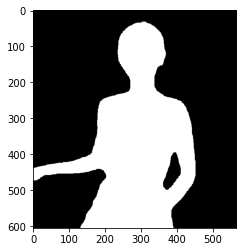

(626, 417)


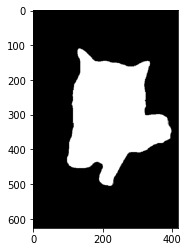

In [18]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함

#카리나 사진을 인물의 예시로 (output_k를 다른 아웃풋으로 바꿔주면 된다.)
seg_map_k = np.all(output_k==seg_color_person, axis=-1)
seg_map_j = np.all(output_j==seg_color_person, axis=-1)
seg_map_h = np.all(output_h==seg_color_person, axis=-1)

print(seg_map_k.shape) 
plt.imshow(seg_map_k, cmap='gray')
plt.show()

#고양이 사진 예시
seg_map_cat = np.all(output_cat==seg_color_cat, axis=-1) 
print(seg_map_cat.shape) 
plt.imshow(seg_map_cat, cmap='gray')
plt.show()

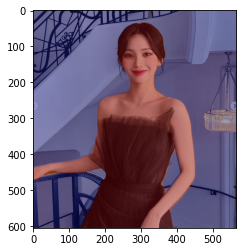

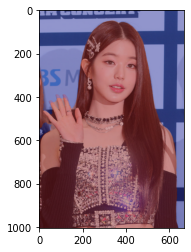

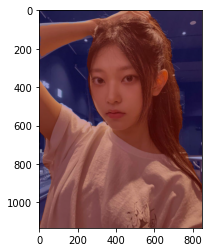

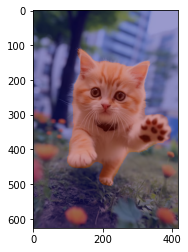

In [22]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
k_img_show = k_img.copy()
j_img_show = j_img.copy()
h_img_show = h_img.copy()
cat_img_show = cat_img.copy()

# 각 사진의 mask로 True과 False인 값을 각각 255과 0으로 바꿔줍니다
k_img_mask = seg_map_k.astype(np.uint8) * 255
j_img_mask = seg_map_j.astype(np.uint8) * 255
h_img_mask = seg_map_h.astype(np.uint8) * 255
cat_img_mask = seg_map_cat.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
k_color_mask = cv2.applyColorMap(k_img_mask, cv2.COLORMAP_JET)
j_color_mask = cv2.applyColorMap(j_img_mask, cv2.COLORMAP_JET)
h_color_mask = cv2.applyColorMap(h_img_mask, cv2.COLORMAP_JET)
cat_color_mask = cv2.applyColorMap(cat_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.(투명도의 개념인가?)
k_img_show = cv2.addWeighted(k_img_show, 0.6, k_color_mask, 0.4, 0.0)
j_img_show = cv2.addWeighted(j_img_show, 0.6, j_color_mask, 0.4, 0.0)
h_img_show = cv2.addWeighted(h_img_show, 0.6, h_color_mask, 0.4, 0.0)
cat_img_show = cv2.addWeighted(cat_img_show, 0.6, cat_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(k_img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(j_img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(h_img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(cat_img_show, cv2.COLOR_BGR2RGB))
plt.show()



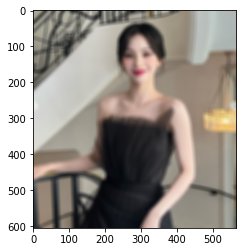

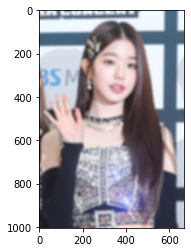

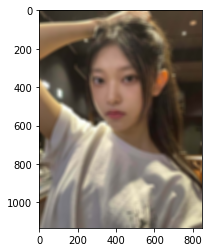

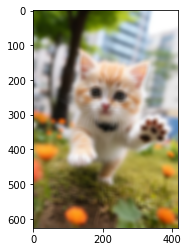

In [25]:
#각 인물,고양이 사진을 블러처리

# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
k_img_blur = cv2.blur(k_img, (13,13))
j_img_blur = cv2.blur(j_img, (15,15))
h_img_blur = cv2.blur(h_img, (20,20))
cat_img_blur = cv2.blur(cat_img, (13,13))


# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(k_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(j_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(h_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(cat_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

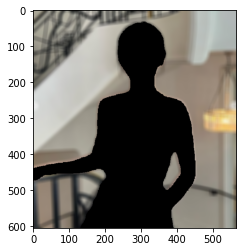

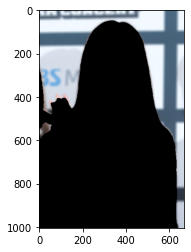

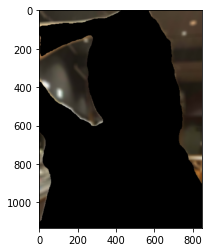

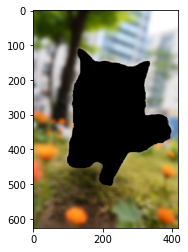

In [28]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 

k_img_mask_color = cv2.cvtColor(k_img_mask, cv2.COLOR_GRAY2BGR)
j_img_mask_color = cv2.cvtColor(j_img_mask, cv2.COLOR_GRAY2BGR)
h_img_mask_color = cv2.cvtColor(h_img_mask, cv2.COLOR_GRAY2BGR)
cat_img_mask_color = cv2.cvtColor(cat_img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
k_img_bg_mask = cv2.bitwise_not(k_img_mask_color)
j_img_bg_mask = cv2.bitwise_not(j_img_mask_color)
h_img_bg_mask = cv2.bitwise_not(h_img_mask_color)
cat_img_bg_mask = cv2.bitwise_not(cat_img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
k_img_bg_blur = cv2.bitwise_and(k_img_blur, k_img_bg_mask)
plt.imshow(cv2.cvtColor(k_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

j_img_bg_blur = cv2.bitwise_and(j_img_blur, j_img_bg_mask)
plt.imshow(cv2.cvtColor(j_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

h_img_bg_blur = cv2.bitwise_and(h_img_blur, h_img_bg_mask)
plt.imshow(cv2.cvtColor(h_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

cat_img_bg_blur = cv2.bitwise_and(cat_img_blur,cat_img_bg_mask)
plt.imshow(cv2.cvtColor(cat_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

## 인물 사진 적용하기 -> 블러처리된 배경 + 원본사진에서 사람 seg를 합성!

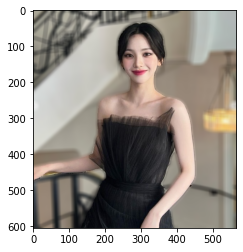

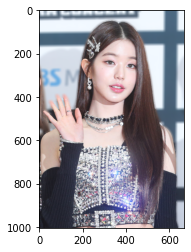

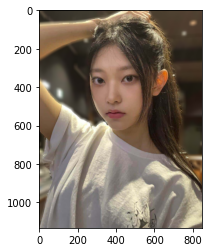

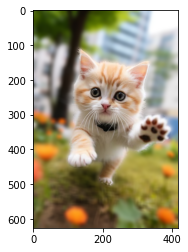

In [29]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
#img_mask_color에서 사람이 255, 배경이 0
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)

#사람인 부분은 원래 이미지로, 백그라운드 부분은 블러처리되어 객체가 빠진 백그라운드만.
k_img_concat = np.where(k_img_mask_color==255, k_img, k_img_bg_blur)
plt.imshow(cv2.cvtColor(k_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

j_img_concat = np.where(j_img_mask_color==255, j_img, j_img_bg_blur)
plt.imshow(cv2.cvtColor(j_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

h_img_concat = np.where(h_img_mask_color==255, h_img, h_img_bg_blur)
plt.imshow(cv2.cvtColor(h_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

cat_img_concat = np.where(cat_img_mask_color==255, cat_img, cat_img_bg_blur)
plt.imshow(cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 2) 크로마키 합성하기

<class 'numpy.ndarray'> (417, 626, 3)


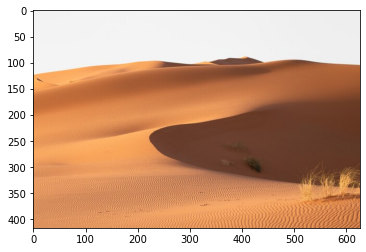

In [35]:
# 배경이미지 가져오기

bg_img_path = os.path.join(img_path,'desert_img.jpeg')
bg_img = cv2.imread(bg_img_path)

print(type(bg_img), bg_img.shape)
plt.imshow(cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB))
plt.show() 

(417, 626, 3)


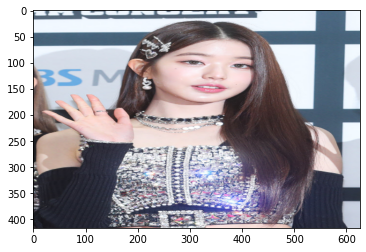

In [39]:
#desert 배경 사진의 크기는 (417, 626, 3)
#카리나 : (605, 566, 3)
#장원영 : (1005, 670, 3)
#해린 : (1134, 850, 3
#고양이 : (626, 417, 3)

# 배경화면과 인물사진의 크기가 맞아야하므로 장원영의 사진이 적당해보인다. j_img 원본으로 초기화
j_img = cv2.imread(image_j_path)

# cv2.resize를 활용하여 크기를 인물사진을 배경사진의 크기와 같게 만들어 준다.
# resize의 크기는 채널을 제외한 width, height를 기준으로 해줘야한다.
height, width, ch = bg_img.shape
j_img = cv2.resize(j_img, (width, height))

#
j_img_mask_color2 = j_img_mask_color.copy() 
j_img_mask_color2 = cv2.resize(j_img_mask_color2, (width, height))

plt.imshow(cv2.cvtColor(j_img, cv2.COLOR_BGR2RGB))
print(j_img.shape)
plt.show()


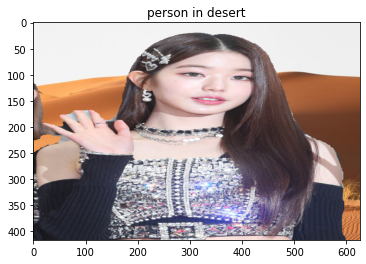

In [43]:
#배경과 이전 인물 사진에서 만든 j_img사진 합성하기
j_img_concat = np.where(j_img_mask_color2==255, j_img, bg_img)
plt.imshow(cv2.cvtColor(j_img_concat, cv2.COLOR_BGR2RGB))
plt.title("person in desert")
plt.show()


## 3) 인물모드 사진의 문제점과 개선 방안 제시해보기

### 문제점
- segmentation의 정확도 1이 아닌 이상 합성 시 어색한 부분이 존재한다.
ex)인물인데 흐려지는 경우가 발생, 배경인데 뚜렷한 경우가 발생


### 개선 방안 제시
- 합성된 이미지와 원본 사진을 겹치게 하여 픽셀의 값의 차이를 구하여 0이 되는 부분은 잘 구분이 되기 때문에 0이 아닌 부분에 대한 후처리를 적용한다.

